In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
num_df = pd.read_csv("Resources/num_df.csv")
num_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


Run random forest classifier and plot feature importance using feature selection

In [3]:
# Split our preprocessed data into our features and target arrays
X=num_df.drop(columns='IS_SUCCESSFUL')
y=num_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [71]:
clf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8159695226247862
Testing Score: 0.713935860058309


In [72]:
feature_importances = clf.feature_importances_
feature_importances

array([1.92658175e-04, 3.99802137e-01, 2.06477458e-03, 2.36571912e-02,
       1.72967249e-02, 1.44903453e-02, 1.75656739e-02, 2.72678950e-02,
       1.18856726e-02, 4.22603838e-03, 4.42575949e-03, 1.33611318e-01,
       1.24083272e-03, 1.25637315e-01, 6.54094367e-04, 7.49431996e-05,
       2.76499631e-04, 1.39996877e-02, 9.10487174e-03, 1.77155750e-02,
       1.98489220e-02, 8.92542574e-03, 1.92869018e-02, 3.52027783e-03,
       1.30741162e-03, 6.25744391e-05, 1.04088697e-02, 1.19831230e-02,
       2.69491954e-02, 2.76692955e-03, 5.70868363e-04, 2.06763307e-02,
       9.51528344e-03, 6.32604062e-03, 3.64667410e-03, 6.16183643e-03,
       3.06493284e-03, 6.81569470e-03, 7.31137995e-03, 2.15837283e-03,
       2.44859849e-03, 5.17971313e-04, 5.36377027e-04])

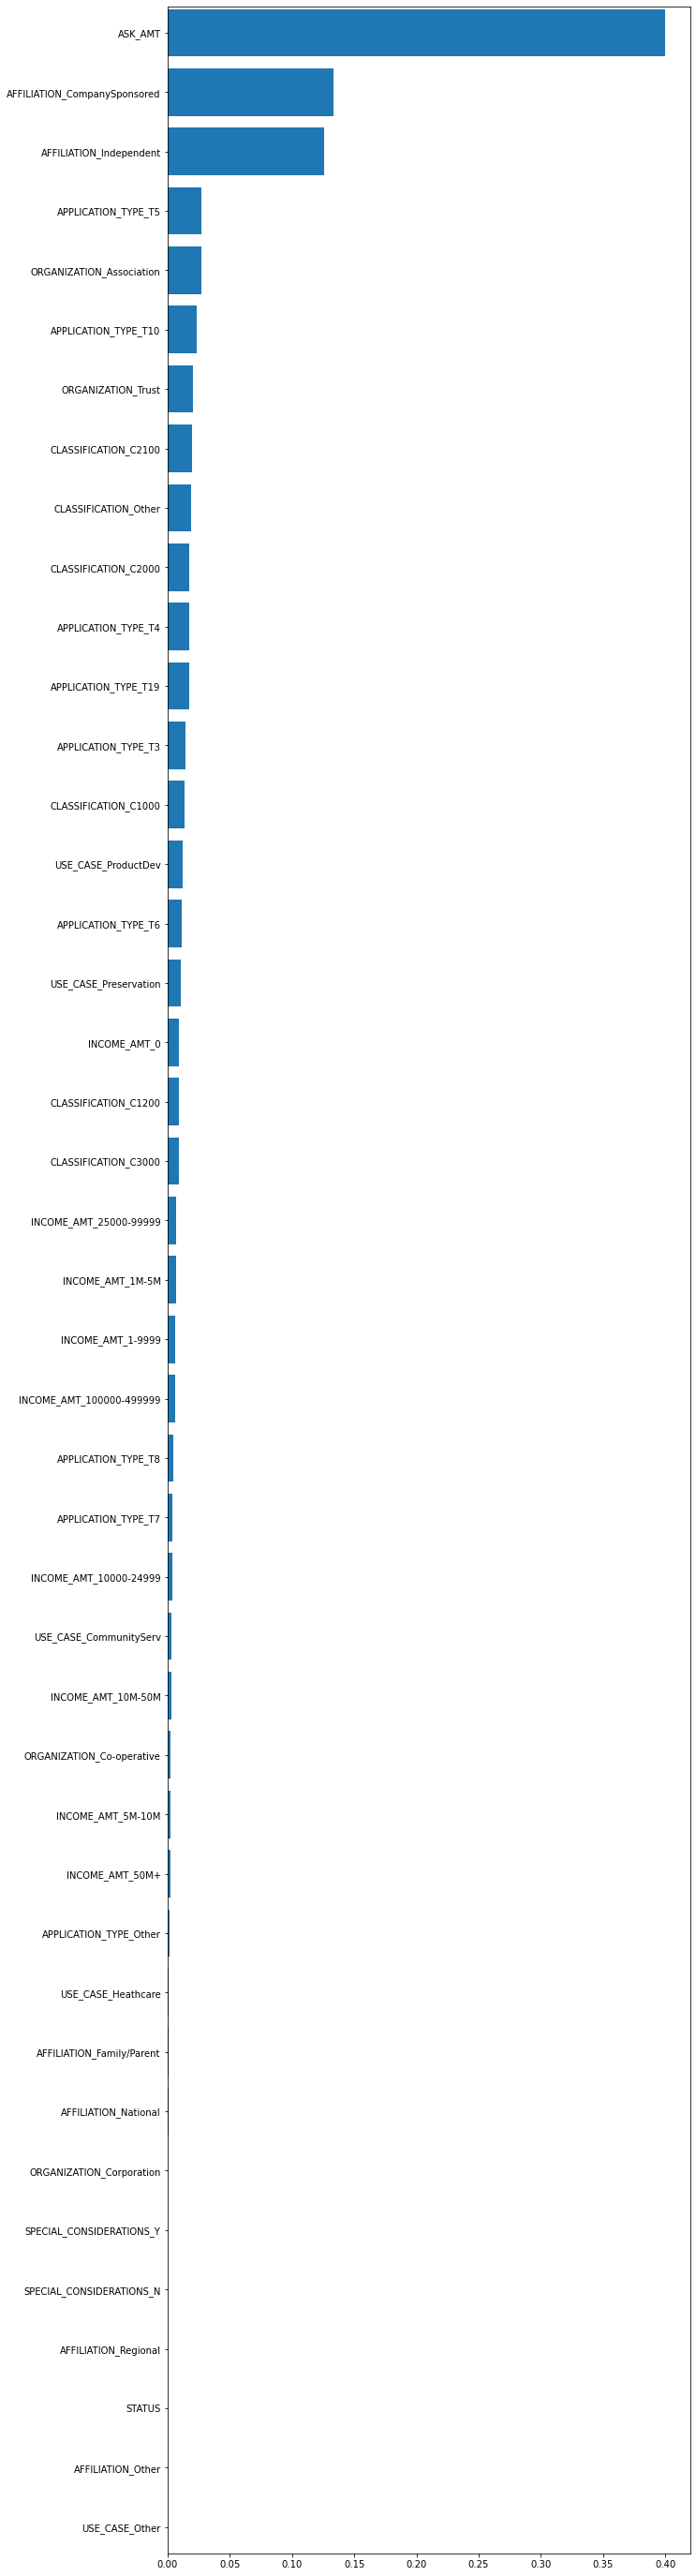

In [7]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,50)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [77]:
cols[33:43]

['CLASSIFICATION_C2000',
 'CLASSIFICATION_Other',
 'CLASSIFICATION_C2100',
 'ORGANIZATION_Trust',
 'APPLICATION_TYPE_T10',
 'ORGANIZATION_Association',
 'APPLICATION_TYPE_T5',
 'AFFILIATION_Independent',
 'AFFILIATION_CompanySponsored',
 'ASK_AMT']

In [87]:
rf_df=num_df[['IS_SUCCESSFUL','CLASSIFICATION_C2000',
 'CLASSIFICATION_Other',
 'CLASSIFICATION_C2100',
 'ORGANIZATION_Trust',
 'APPLICATION_TYPE_T10',
 'ORGANIZATION_Association',
 'APPLICATION_TYPE_T5',
 'AFFILIATION_Independent',
 'AFFILIATION_CompanySponsored',
 'ASK_AMT']]
rf_df.head()

,IS_SUCCESSFUL,CLASSIFICATION_C2000,CLASSIFICATION_Other,CLASSIFICATION_C2100,ORGANIZATION_Trust,APPLICATION_TYPE_T10,ORGANIZATION_Association,APPLICATION_TYPE_T5,AFFILIATION_Independent,AFFILIATION_CompanySponsored,ASK_AMT
0,1,0,0,0,0,1,1,0,1,0,5000
1,1,1,0,0,0,0,0,0,1,0,108590
2,0,0,0,0,0,0,1,1,0,1,5000
3,1,1,0,0,1,0,0,0,0,1,6692
4,1,0,0,0,1,0,0,0,1,0,142590


Run a logistic regression on features found from features determined to be important by random forest

In [8]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=42))

In [9]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=42)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)


In [10]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7136137459182087
Testing Score: 0.713469387755102


In [11]:
len(X_selected_train_scaled[0])

6

Find the importance of each feature using RFE and run a logistic regression on those features

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [79]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X_train_scaled, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
print(len(fit.ranking_))

Num Features: 10
Selected Features: [False False False  True  True  True  True  True  True False False  True
 False False False False False False False False  True False  True False
 False False  True False False False False False False False False False
 False False False False False False False]
Feature Ranking: [30 32 14  1  1  1  1  1  1 17 22  1 19 18 26 11 33 27 15 28  1  7  1 34
 25 13  1  8  3 23 24  4  2  5 12 20 10  6 21  9 16 31 29]
43


In [80]:
rankings=fit.ranking_
rankings
important=[2]
for inx,rank in enumerate(rankings):
    if rank == 1:
        important.append(inx+1)
        
important

[2, 4, 5, 6, 7, 8, 9, 12, 21, 23, 27]

In [81]:
new_df=num_df.iloc[:,important]
new_df

,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,CLASSIFICATION_C2100,CLASSIFICATION_Other,USE_CASE_Preservation
0,1,1,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,0
3,1,0,0,1,0,0,0,1,0,0,1
4,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0,0,0,1,0,0,0,0,0,0
34295,0,0,0,0,1,0,0,1,0,0,0
34296,0,0,0,1,0,0,0,1,0,0,1
34297,1,0,0,0,0,1,0,0,0,0,0


In [82]:
new_X=new_df.drop(columns='IS_SUCCESSFUL')
new_y=new_df['IS_SUCCESSFUL']
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, random_state=42)

In [83]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
XX_train = X_scaler.transform(X_train)
XX_test = X_scaler.transform(X_test)

In [84]:
clf.fit(XX_train, y_train)
print(f'Training Score: {clf.score(XX_train, y_train)}')
print(f'Testing Score: {clf.score(XX_test, y_test)}')

Training Score: 0.7205333540662416
Testing Score: 0.7225655976676385


Run Keras Tuner

In [19]:
import tensorflow as tf

In [20]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=10,
        max_value=80,
        step=10), activation=activation, input_dim=43))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=40,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [32]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=30,
    hyperband_iterations=2,
    overwrite = True)

In [33]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=30,validation_data=(X_test_scaled,y_test))

Trial 180 Complete [00h 01m 18s]
val_accuracy: 0.7336443066596985

Best val_accuracy So Far: 0.7343440055847168
Total elapsed time: 00h 40m 10s
INFO:tensorflow:Oracle triggered exit


In [34]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 30,
 'num_layers': 4,
 'units_0': 16,
 'units_1': 11,
 'units_2': 16,
 'units_3': 16,
 'units_4': 16,
 'tuner/epochs': 30,
 'tuner/initial_epoch': 10,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': 'b5696de07f9edb092c73e42cf1c42e99'}

In [35]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5538 - accuracy: 0.7343
Loss: 0.553809642791748, Accuracy: 0.7343440055847168


Run deep learning model using best values and top 10 features determined by RPE and additional epochs

In [63]:
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=10))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=11, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Sixth hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_33 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_34 (Dense)             (None, 11)                187       
_________________________________________________________________
dense_35 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_36 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                

In [64]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [65]:
new_X=new_df.drop(columns='IS_SUCCESSFUL')
new_y=new_df['IS_SUCCESSFUL']
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
XX_train = X_scaler.transform(X_train)
XX_test = X_scaler.transform(X_test)

In [85]:
# Train the model
fit_model = nn.fit(XX_train, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5992 - accuracy: 0.6954
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5776 - accuracy: 0.7179
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5767 - accuracy: 0.7202
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5759 - accuracy: 0.7199: 0s - loss: 0.5752 - 
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5757 - accuracy: 0.7198
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5757 - accuracy: 0.7200
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5754 - accuracy: 0.7196
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5755 - accuracy: 0.7201
Epoch 9/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5753 - accuracy: 0.7203
Epoch 10/100
804/804 [==============================] - 2s 3ms/step -

804/804 [==============================] - 1s 2ms/step - loss: 0.5750 - accuracy: 0.7201
Epoch 80/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5749 - accuracy: 0.7204: 0s - loss: 0.5744 - accura
Epoch 81/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5748 - accuracy: 0.7205
Epoch 82/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5751 - accuracy: 0.7204
Epoch 83/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5751 - accuracy: 0.7204
Epoch 84/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5748 - accuracy: 0.7203
Epoch 85/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5749 - accuracy: 0.7205
Epoch 86/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5750 - accuracy: 0.7205
Epoch 87/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5749 - accuracy: 0.7206
Epoch 88/100
804/804 [==============================] - 2s 2ms/step

In [86]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(XX_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5784 - accuracy: 0.7227
Loss: 0.578405499458313, Accuracy: 0.7226822376251221


Run deep learning model using best values and the top 10 features determined by random forest

In [88]:
rf_df.head()

,IS_SUCCESSFUL,CLASSIFICATION_C2000,CLASSIFICATION_Other,CLASSIFICATION_C2100,ORGANIZATION_Trust,APPLICATION_TYPE_T10,ORGANIZATION_Association,APPLICATION_TYPE_T5,AFFILIATION_Independent,AFFILIATION_CompanySponsored,ASK_AMT
0,1,0,0,0,0,1,1,0,1,0,5000
1,1,1,0,0,0,0,0,0,1,0,108590
2,0,0,0,0,0,0,1,1,0,1,5000
3,1,1,0,0,1,0,0,0,0,1,6692
4,1,0,0,0,1,0,0,0,1,0,142590


In [89]:
rf_X=rf_df.drop(columns='IS_SUCCESSFUL')
rf_y=rf_df['IS_SUCCESSFUL']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(rf_X, rf_y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
XX_train = X_scaler.transform(X_train)
XX_test = X_scaler.transform(X_test)

In [91]:
# Train the model
fit_model = nn.fit(XX_train, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5855 - accuracy: 0.7116
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5795 - accuracy: 0.7149
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5779 - accuracy: 0.7144
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5774 - accuracy: 0.7151
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5769 - accuracy: 0.7152
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5769 - accuracy: 0.7144
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5767 - accuracy: 0.7143
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5761 - accuracy: 0.7159: 0s - loss: 0.5734 - ac
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5766 - accuracy: 0.7155
Epoch 10/100
804/804 [==============================] - 1s 2ms/step

804/804 [==============================] - 2s 2ms/step - loss: 0.5704 - accuracy: 0.7189
Epoch 81/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5706 - accuracy: 0.7190
Epoch 82/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5703 - accuracy: 0.7179
Epoch 83/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5701 - accuracy: 0.7171
Epoch 84/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5700 - accuracy: 0.7180
Epoch 85/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5727 - accuracy: 0.7185
Epoch 86/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5706 - accuracy: 0.7179
Epoch 87/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5703 - accuracy: 0.7174
Epoch 88/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5721 - accuracy: 0.7193
Epoch 89/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5703 - accuracy: 

In [92]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(XX_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5773 - accuracy: 0.7129
Loss: 0.577295184135437, Accuracy: 0.7128862738609314


Run model with additional Epochs and all features

In [103]:
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=11, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Sixth hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 30)                1320      
_________________________________________________________________
dense_47 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_48 (Dense)             (None, 11)                187       
_________________________________________________________________
dense_49 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_50 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_51 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_52 (Dense)             (None, 1)                

In [104]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [105]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [106]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5841 - accuracy: 0.7049
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5561 - accuracy: 0.7297
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5532 - accuracy: 0.7290
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7308
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5500 - accuracy: 0.7307: 0s - loss: 0.5489 
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5483 - accuracy: 0.7306: 0s - los
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5476 - accuracy: 0.7315
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5476 - accuracy: 0.7310
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5472 - accuracy: 0.7323
Epoch 10/100
804/804 [==============================] - 2s 2m

804/804 [==============================] - 2s 2ms/step - loss: 0.5372 - accuracy: 0.7393
Epoch 81/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5366 - accuracy: 0.7387
Epoch 82/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7387
Epoch 83/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5365 - accuracy: 0.7385
Epoch 84/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 0.7387
Epoch 85/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7393
Epoch 86/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5369 - accuracy: 0.7385
Epoch 87/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5362 - accuracy: 0.7380
Epoch 88/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5370 - accuracy: 0.7383
Epoch 89/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5361 - accuracy: 

In [107]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5595 - accuracy: 0.7287
Loss: 0.5594637989997864, Accuracy: 0.7287463545799255


In [ ]:
nn.save("model.h5")
print("Saved model to computer")